In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
test_size = 0.3
val_size = 0.6
train_size =0.7

random_state = 42

In [4]:
data = pd.read_csv('../../data/feature_sets/only_in_game_data_v1.csv')

In [5]:
len(data)

457031

In [6]:
columns_to_drop = [
'riot_match_id',
'min_start_time',

'patch_version',
 'blue_team_id',
 'blue_top_player',
 'blue_jungle_player',
 'blue_mid_player',
 'blue_bot_player',
 'blue_supp_player',
 'red_team_id',
 'red_top_player',
 'red_jungle_player',
 'red_mid_player',
 'red_bot_player',
 'red_supp_player',
 'league',
 'format',
 'game_in_format',
 'season_format',
 'month',
 'day',
 'year'
 ]

In [7]:
extar_info = data[columns_to_drop]
data.drop(columns=columns_to_drop,inplace=True)


In [8]:
pred = data.pop('red_team_outcome')

In [9]:
x_train, x_temp, y_train, y_temp = train_test_split(data,pred,test_size=test_size,random_state = random_state,shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size = val_size,random_state = random_state,shuffle=True)

In [10]:
assert len(data) == len(x_train) + len(x_test) + len(x_val)
assert len(data) == len(y_train) + len(y_val) + len(y_test)

In [11]:
num_input = len(data.columns)
num_input

115

In [12]:
model = Sequential()
model.add(Dense(1024, input_shape=(num_input,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [13]:
patience = 10
learning_rate = 1e-6
epochs = 100
batch_size= 512

In [14]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=0, mode='min')
mcp_save = keras.callbacks.ModelCheckpoint('mdl_wts.keras', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=True, validation_data=(x_val, y_val))

Epoch 1/100
625/625 [==============================] - 16s 23ms/step - loss: 184.9700 - accuracy: 0.5081 - val_loss: 49.6876 - val_accuracy: 0.4623
Epoch 2/100
625/625 [==============================] - 13s 21ms/step - loss: 106.3575 - accuracy: 0.5137 - val_loss: 15.9585 - val_accuracy: 0.4615
Epoch 3/100
625/625 [==============================] - 13s 22ms/step - loss: 76.5786 - accuracy: 0.5157 - val_loss: 10.8456 - val_accuracy: 0.4648
Epoch 4/100
625/625 [==============================] - 13s 22ms/step - loss: 59.8838 - accuracy: 0.5178 - val_loss: 8.6787 - val_accuracy: 0.4677
Epoch 5/100
625/625 [==============================] - 14s 22ms/step - loss: 48.3480 - accuracy: 0.5190 - val_loss: 5.8032 - val_accuracy: 0.4674
Epoch 6/100
625/625 [==============================] - 14s 22ms/step - loss: 40.5061 - accuracy: 0.5201 - val_loss: 2.5426 - val_accuracy: 0.4691
Epoch 7/100
625/625 [==============================] - 14s 22ms/step - loss: 34.0883 - accuracy: 0.5224 - val_loss: 1.0

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2571/2571 [==============================] - 6s 2ms/step - loss: 0.5066 - accuracy: 0.7354
Accuracy: 73.54


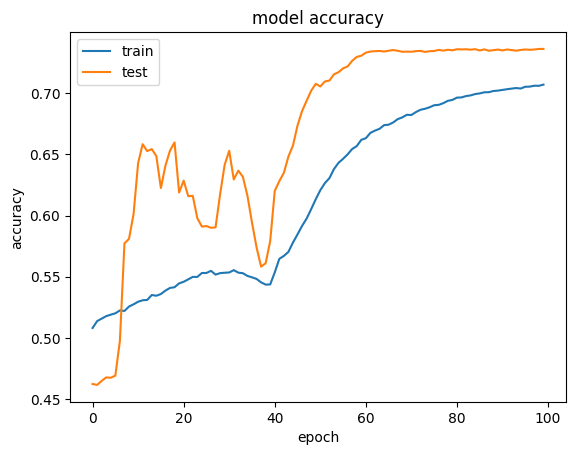

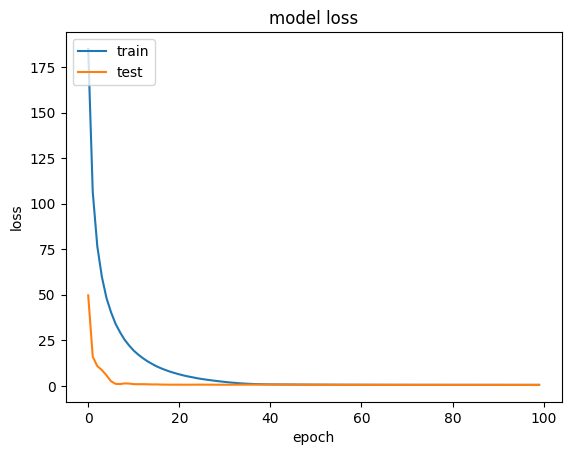

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
test_data = pd.read_csv('../../data/feature_sets/only_in_game_data_v1.csv')


In [19]:
test_pred = test_data.pop('red_team_outcome')


In [20]:
test_extra_info = test_data[columns_to_drop]
test_data.drop(columns=columns_to_drop,inplace=True)


In [21]:
random_rows = test_data.sample(n=5)

In [22]:
random_rows

,blue_team_total_gold,blue_team_inhibitors,blue_team_towers,blue_team_barons,blue_team_total_kills,blue_team_ocean_drakes,blue_team_cloud_drakes,blue_team_mountain_drakes,blue_team_chemtech_drakes,blue_team_infernal_drakes,...,blue_jungle_champ,blue_mid_champ,blue_bot_champ,blue_supp_champ,red_top_champ,red_jungle_champ,red_mid_champ,red_bot_champ,red_supp_champ,time_in_game
56242,62906,0,2,0,3,0,0,0,1,0,...,83,23,78,93,151,74,140,174,79,2226.0
25113,47682,0,2,1,7,0,1,0,2,0,...,74,23,122,129,52,121,12,174,95,1622.0
294315,52117,0,3,0,9,0,0,0,0,0,...,158,2,54,9,70,146,12,153,122,1739.0
225125,45753,0,5,0,12,0,0,0,1,0,...,74,7,57,95,70,121,140,153,139,1501.0
408790,49377,0,7,1,10,0,0,0,0,0,...,48,12,164,109,149,162,140,55,95,184.0


In [42]:
print(test_data.iloc[408790])

blue_team_total_gold          49377.0
blue_team_inhibitors              0.0
blue_team_towers                  7.0
blue_team_barons                  1.0
blue_team_total_kills            10.0
blue_team_ocean_drakes            0.0
blue_team_cloud_drakes            0.0
blue_team_mountain_drakes         0.0
blue_team_chemtech_drakes         0.0
blue_team_infernal_drakes         0.0
blue_team_hextech_drakes          0.0
blue_team_elder_drakes            0.0
blue_top_total_gold            8811.0
blue_top_level                   13.0
blue_top_kills                    1.0
blue_top_deaths                   4.0
blue_top_assists                  2.0
blue_top_creep_score            174.0
blue_top_current_health        2038.0
blue_top_max_health            2038.0
blue_jungle_total_gold         8509.0
blue_jungle_level                13.0
blue_jungle_kills                 0.0
blue_jungle_deaths                1.0
blue_jungle_assists               9.0
blue_jungle_creep_score         129.0
blue_jungle_

In [23]:
random_rows['index'] = random_rows.index

C:\Users\joshu_rdnqgbx\AppData\Local\Temp\ipykernel_5336\1653804312.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_rows['index'] = random_rows.index


In [37]:
test_extra_info.iloc[408790]

riot_match_id                111997906552170268
min_start_time        2024-03-31 18:00:00+00:00
patch_version                               184
blue_team_id                               2170
blue_top_player              110350224593953686
blue_jungle_player           103877629120745120
blue_mid_player              104711049101664016
blue_bot_player              103536968833612789
blue_supp_player             107564404490889053
red_team_id                                2169
red_top_player                99566406047571736
red_jungle_player            105537190986692036
red_mid_player                98767975968177297
red_bot_player                98767975961872793
red_supp_player               99322214629661297
league                                        2
format                                        1
game_in_format                                2
season_format                                 0
month                                         3
day                                     

In [25]:
test_pred.iloc[int(354393.0)]

1

In [26]:
random_rows_predictions = []
for i in range(len(random_rows)):
    print(test_pred.iloc[int(random_rows.iloc[i]['index'])])

1
1
1
0
1


In [27]:
random_rows.drop(columns = 'index',inplace = True)

In [28]:
random_rows_results = model.predict(random_rows)

1/1 [==============================] - 0s 94ms/step


In [29]:
random_rows_results

array([[0.92380065],
       [0.38341016],
       [0.42861503],
       [0.2584831 ],
       [0.15459871]], dtype=float32)

In [30]:
all_results = model.predict(test_data)

14283/14283 [==============================] - 19s 1ms/step


In [31]:
threshold_results = []
for result in all_results:
    if result > 0.5:
        threshold_results.append(1)
    else:
        threshold_results.append(0)

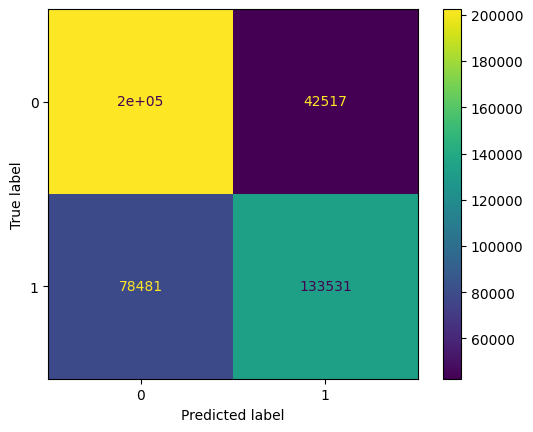

In [32]:
confusion_matrix = metrics.confusion_matrix(test_pred, threshold_results)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

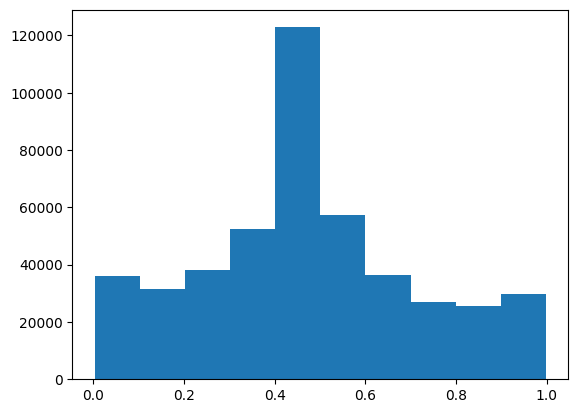

In [33]:
plt.hist(all_results)
plt.show() 

In [34]:
metrics.precision_score(test_pred, threshold_results)


0.7584920021812233

In [35]:
metrics.recall_score(test_pred, threshold_results)


0.6298275569307398

In [36]:
model.save('../saved_models/only_in_game_data_v5.keras')